In [1]:
# ----------------------------------------------
# Step 1: Import libraries and create database
# ----------------------------------------------
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create/connect to a SQLite database file
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

In [3]:
# Create the 'sales' table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price INTEGER
)
''')
conn.commit()
print("✅ Table created successfully.")

✅ Table created successfully.


In [4]:
# ----------------------------------------------
# Step 2: Insert dummy data
# ----------------------------------------------

sales_data = [
    ('Laptop', 2, 60000),
    ('Phone', 5, 20000),
    ('Headphone', 10, 1500),
    ('Tablet', 3, 25000),
    ('Mouse', 7, 700)
]

cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sales_data)
conn.commit()
print("✅ Sample data inserted into table.")

✅ Sample data inserted into table.


In [5]:
# ----------------------------------------------
# Step 3: Run SQL query to summarize sales
# ----------------------------------------------

query = '''
SELECT
  product,
  SUM(quantity) AS total_quantity,
  SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product
'''

# Read query results into pandas DataFrame
df = pd.read_sql_query(query, conn)
print("✅ SQL Query Result:\n")
print(df)


✅ SQL Query Result:

     product  total_quantity  total_revenue
0  Headphone              10          15000
1     Laptop               2         120000
2      Mouse               7           4900
3      Phone               5         100000
4     Tablet               3          75000


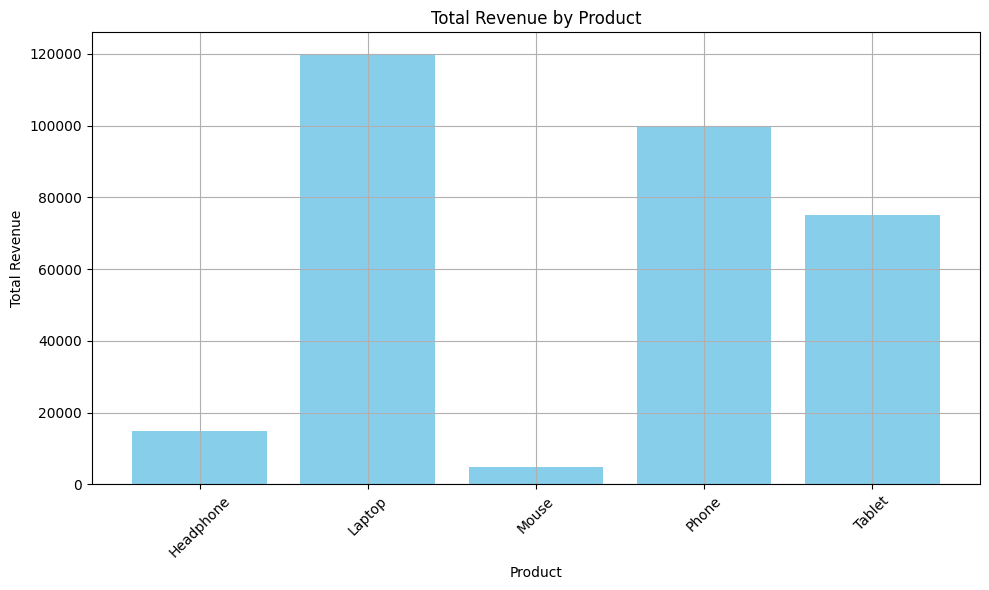

In [6]:
# ----------------------------------------------
# Step 4: Plot the results using matplotlib
# ----------------------------------------------

plt.figure(figsize=(10, 6))
plt.bar(df['product'], df['total_revenue'], color='skyblue')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

# Close the database connection (optional)
conn.close()